In [8]:
%pip install pflacco
%pip install cma
%pip install ioh

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 10.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 14.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 14.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 5.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart 

In [1]:
from pflacco.sampling import create_initial_sample

from pflacco.classical_ela_features import calculate_ela_distribution
from pflacco.misc_features import calculate_fitness_distance_correlation
from pflacco.local_optima_network_features import compute_local_optima_network, calculate_lon_features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pflacco.sampling import create_initial_sample
from pflacco.classical_ela_features import calculate_ela_distribution
from pflacco.misc_features import calculate_fitness_distance_correlation
import cma
from pflacco.classical_ela_features import (

    calculate_dispersion,

    calculate_ela_distribution,

    calculate_ela_level,

    calculate_ela_meta,

    calculate_information_content,

    calculate_nbc,

)

from pflacco.sampling import create_initial_sample

def objective_function(x):
    return x[0]**2 - x[1]**2

dim = 2

X = create_initial_sample(dim, sample_type = 'lhs')
y = X.apply(lambda x: objective_function(x), axis = 1)

ela_distr = calculate_ela_distribution(X, y)
print(ela_distr)

fdc = calculate_fitness_distance_correlation(X, y)
print(fdc)

{'ela_distr.skewness': -0.10541237886406137, 'ela_distr.kurtosis': -0.5921070358502889, 'ela_distr.number_of_peaks': 1, 'ela_distr.costs_runtime': 0.0}
{'fitness_distance.fd_correlation': 0.5757732882498752, 'fitness_distance.fd_cov': 0.005913513600011123, 'fitness_distance.distance_mean': 0.145804547426073, 'fitness_distance.distance_std': 0.1125705074362424, 'fitness_distance.fitness_mean': -0.7513851733588387, 'fitness_distance.fitness_std': 0.09123667788021743, 'fitness_distance.costs_runtime': 0.0}


In [ ]:
bbob_functions = {
    1: cma.bbobbenchmarks.F1,
    2: cma.bbobbenchmarks.F2,
    3: cma.bbobbenchmarks.F3,
    4: cma.bbobbenchmarks.F4,
    5: cma.bbobbenchmarks.F5,
}

dim = 2
samples = 100
num_of_samples = 1000

ela_data = []

for func_id, func_class in bbob_functions.items():
  for x in range(0,num_of_samples):
      func = func_class()

      x_samples = np.random.uniform(-5, 5, (samples, dim))
      y_samples = np.array([func(x) for x in x_samples])

      ela_distr = calculate_ela_distribution(x_samples, y_samples)
      ela_fdc = calculate_fitness_distance_correlation(x_samples, y_samples)
      ela_df_distr = pd.DataFrame([ela_distr])
      ela_df_fdc = pd.DataFrame([ela_fdc])
      ela_df = pd.concat([ela_df_distr, ela_df_fdc], axis=1, join='inner')
      ela_df['Function'] = f'F{func_id}'
      ela_data.append(ela_df)]

In [19]:
from ioh import ProblemClass, get_problem
import numpy as np
import pandas as pd
from pflacco.sampling import create_initial_sample
from pflacco.classical_ela_features import calculate_ela_distribution
from pflacco.misc_features import calculate_fitness_distance_correlation
import cma
from pflacco.classical_ela_features import (

    calculate_dispersion,

    calculate_ela_distribution,

    calculate_ela_level,

    calculate_ela_meta,

    calculate_information_content,

    calculate_nbc,

)

dim = 2  # Wymiar przestrzeni
samples = 100  # Liczba próbek na iterację
num_of_samples = 10  # Liczba powtórzeń dla każdej instancji
ela_data = []  # Lista na wyniki ELA

# Zakresy dla BBOB
lower_bound = -5
upper_bound = 5

fid_list = range(1, 25 + 1)  # Zakładamy, że BBOB ma funkcje od 1 do 25
iid_list = range(1, 16 + 1)  # Zakładamy, że każda funkcja ma 16 instancji (domyślnie w BBOB)

# Iterowanie przez funkcje i ich instancje
for dim in range(2, 8):
    for func_id in range(1, 25):
        for iid in iid_list:
            
            problem = get_problem(func_id, iid, dim, ProblemClass.BBOB)
            

            for _ in range(num_of_samples):
                X = create_initial_sample(dim, lower_bound=-5, upper_bound=5)

                y = X.apply(lambda x: problem(x), axis=1)

                ela_distr = calculate_ela_distribution(X, y)
                ela_df_distr = pd.DataFrame([ela_distr])

                ela_fdc = calculate_fitness_distance_correlation(X, y)
                ela_df_fdc = pd.DataFrame([ela_fdc])

                ela_meta = calculate_ela_meta(X, y)
                ela_df_meta = pd.DataFrame([ela_meta])

                ela_level = calculate_ela_level(X, y)
                ela_df_level = pd.DataFrame([ela_level])

                nbc = calculate_nbc(X, y)
                ela_df_nbc = pd.DataFrame([nbc])

                disp = calculate_dispersion(X, y)
                ela_df_disp = pd.DataFrame([disp])

                ic = calculate_information_content(X, y, seed=100)
                ela_df_ic = pd.DataFrame([ic])

                ela_df = pd.concat([ela_df_distr, ela_df_fdc, ela_df_meta, ela_df_level, ela_df_nbc, ela_df_disp, ela_df_ic], axis=1, join='inner')
                ela_df['Function'] = f'F{func_id}'
                ela_df['Instance'] = iid
                ela_df['Dimension'] = dim
                ela_data.append(ela_df)

final_ela_data = pd.concat(ela_data, axis=0, ignore_index=True)

final_ela_data.to_csv("ela_results.csv", index=False)

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  quad_simple_cond = quad_model_con_max/quad_model_con_min
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  quad_simple_cond = quad_model_con_max/quad_model_con_min
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  quad_simple_cond = quad_model_con_max/quad_model_con_min
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  quad_simple_cond = quad_model_con_max/quad_model_con_min
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:108: RuntimeWarning: div

PermissionError: [Errno 13] Permission denied: 'ela_results.csv'

In [ ]:
final_ela_data.to_csv("ela_final_results.csv", index=False)

In [22]:
final_ela_data

ela_distr.skewness  ela_distr.kurtosis  ela_distr.number_of_peaks  \
0                0.308304           -0.857005                          2   
1                0.308304           -0.857005                          2   
2                0.308304           -0.857005                          2   
3                0.308304           -0.857005                          2   
4                0.308304           -0.857005                          2   
...                   ...                 ...                        ...   
23035            0.499619            0.391351                          2   
23036            0.499619            0.391351                          2   
23037            0.499619            0.391351                          2   
23038            0.499619            0.391351                          2   
23039            0.499619            0.391351                          2   

       ela_distr.costs_runtime  fitness_distance.fd_correlation  \
0                        0.016                         0.835722   
1                        0.000                         0.835722   
2                        0.000                         0.835722   
3                        0.000                         0.835722   
4                        0.000                         0.835722   
...                        ...                              ...   
23035                    0.000                         0.403308   
23036                    0.000                         0.403308   
23037                    0.000                         0.403308   
23038                    0.000                         0.403308   
23039                    0.016                         0.403308   

       fitness_distance.fd_cov  fitness_distance.distance_mean  \
0                     0.569806                        1.075864   
1                     0.569806                        1.075864   
2                     0.569806                        1.075864   
3                     0.569806                        1.075864   
4                     0.569806                        1.075864   
...                        ...                             ...   
23035                10.178799                        6.490868   
23036                10.178799                        6.490868   
23037                10.178799                        6.490868   
23038                10.178799                        6.490868   
23039                10.178799                        6.490868   

       fitness_distance.distance_std  fitness_distance.fitness_mean  \
0                           0.626929                      80.878534   
1                           0.626929                      80.878534   
2                           0.626929                      80.878534   
3                           0.626929                      80.878534   
4                           0.626929                      80.878534   
...                              ...                            ...   
23035                       1.828872                      68.835521   
23036                       1.828872                      68.835521   
23037                       1.828872                      68.835521   
23038                       1.828872                      68.835521   
23039                       1.828872                      68.835521   

       fitness_distance.fitness_std  ...  disp.costs_runtime  ic.h_max  \
0                          1.087545  ...               0.015  0.723599   
1                          1.087545  ...               0.000  0.723599   
2                          1.087545  ...               0.000  0.723599   
3                          1.087545  ...               0.000  0.723599   
4                          1.087545  ...               0.000  0.723599   
...                             ...  ...                 ...       ...   
23035                     13.799927  ...               0.000  0.875759   
23036                     13.799927  ...           

In [35]:
ela_data_df = pd.concat(ela_data, ignore_index=True)

selected_features_1 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime', 'fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']
selected_features_2 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime']
selected_features_3 = ['fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']

ela_melted_1 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_1,
                               var_name='ELA Feature', value_name='Value')
ela_melted_2 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_2,
                               var_name='ELA Feature', value_name='Value')
ela_melted_3 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_3,
                               var_name='ELA Feature', value_name='Value')

In [32]:
ela_data_df

ela_distr.skewness  ela_distr.kurtosis  ela_distr.number_of_peaks  \
0               0.677537           -0.676332                          2   
1               0.919965           -0.167648                          2   
2               0.582723           -0.753882                          2   
3               0.802907           -0.582380                          2   
4               0.368691           -1.111600                          2   
...                  ...                 ...                        ...   
4995           -0.226325           -0.711079                          1   
4996            0.165236           -0.952556                          1   
4997            0.035500           -1.080681                          2   
4998           -0.250350           -1.084861                          2   
4999           -0.028749           -0.990174                          1   

      ela_distr.costs_runtime  fitness_distance.fd_correlation  \
0                    0.006479                         0.745913   
1                    0.006064                         0.861619   
2                    0.005701                         0.691505   
3                    0.005672                         0.161306   
4                    0.005682                         0.779640   
...                       ...                              ...   
4995                 0.005529                         0.048913   
4996                 0.005652                         0.371178   
4997                 0.005375                         0.400676   
4998                 0.005209                         0.261787   
4999                 0.005968                         0.584696   

      fitness_distance.fd_cov  fitness_distance.distance_mean  \
0                    0.332012                        0.943905   
1                    0.676771                        1.206890   
2                    0.577709                        1.443223   
3                    0.064996                        1.074923   
4                    0.704500                        1.237584   
...                       ...                             ...   
4995                 0.538904                        2.770568   
4996                 2.426890                        2.339577   
4997                 2.815106                        1.834642   
4998                 1.601915                        2.065869   
4999                 5.531867                        3.938481   

      fitness_distance.distance_std  fitness_distance.fitness_mean  \
0                          0.556053                     -91.461437   
1                          0.638456                     -90.853136   
2                          0.836749                     -90.731182   
3                          0.586574                     -91.306058   
4                          0.912071                     -90.802850   
...                             ...                            ...   
4995                       1.974743                      63.077873   
4996                       1.954119                      58.355422   
4997                       1.741298                      64.723267   
4998                       1.641729                      60.878779   
4999                       2.977292                      60.492056   

      fitness_distance.fitness_std  fitness_distance.costs_runtime Function  
0                         0.800479                        0.003013       F1  
1                         1.230255                        0.003070       F1  
2                         0.998433                        0.002949       F1  
3                         0.686932                        0.002587       F1  
4                         0.990736                        0.002623       F1  
...                            ...                             ...      ...  
4995                      5.579287                        0.002506       F5  
4996                      3.345926                        0.002438

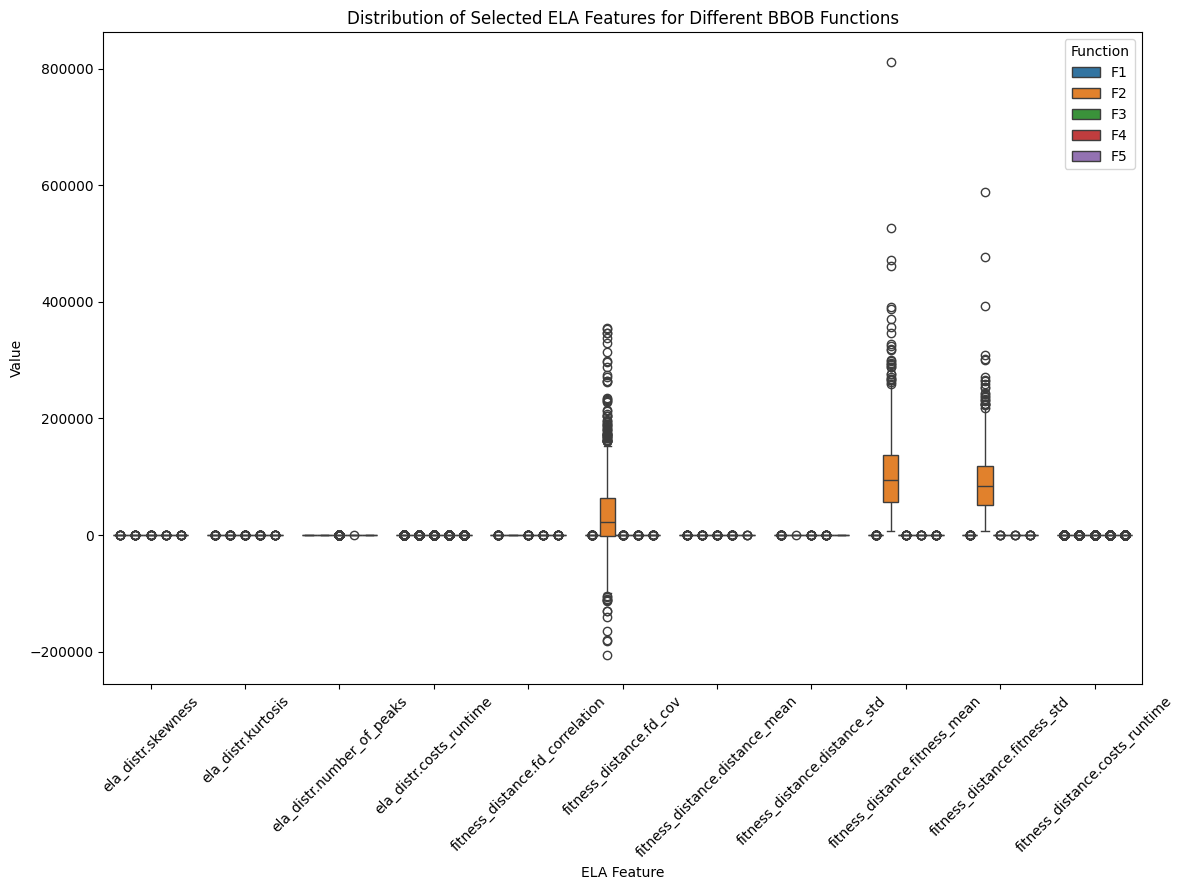

In [36]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_1, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

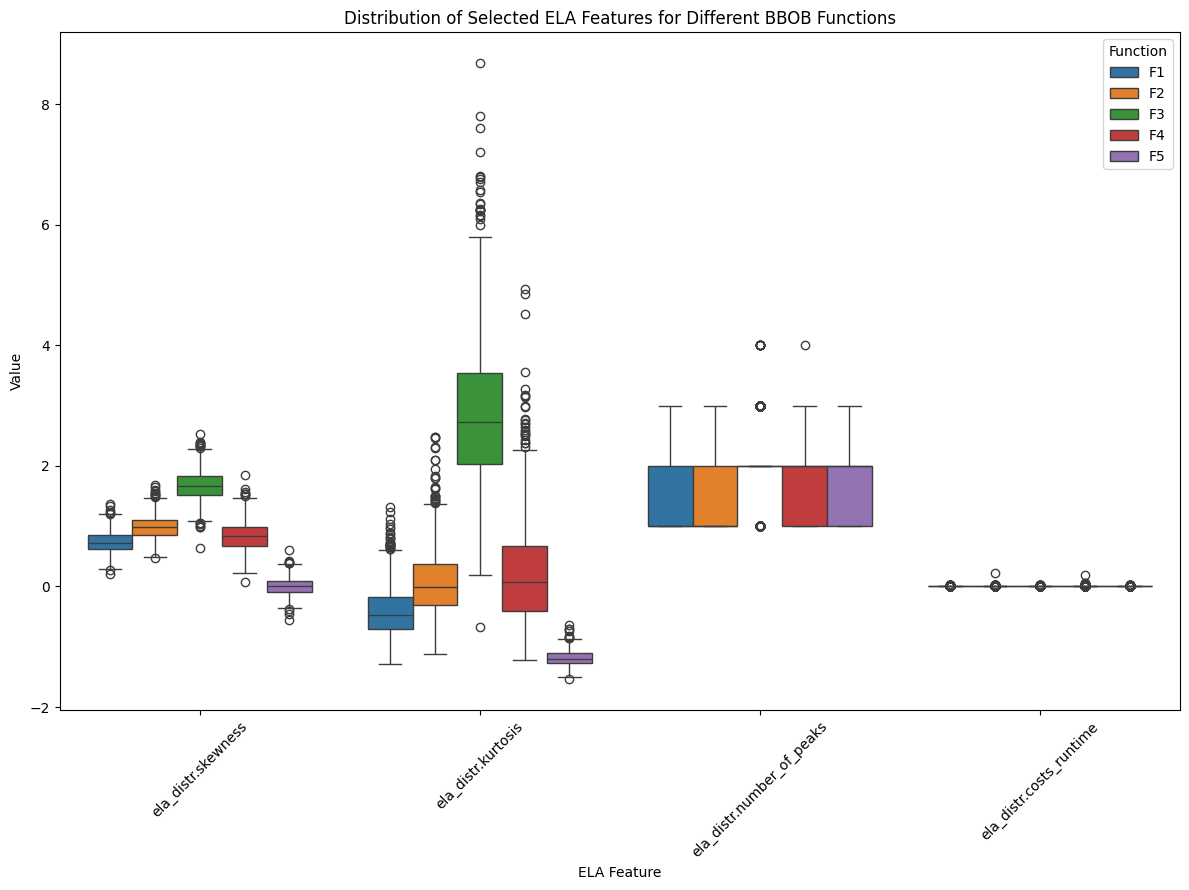

In [37]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_2, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

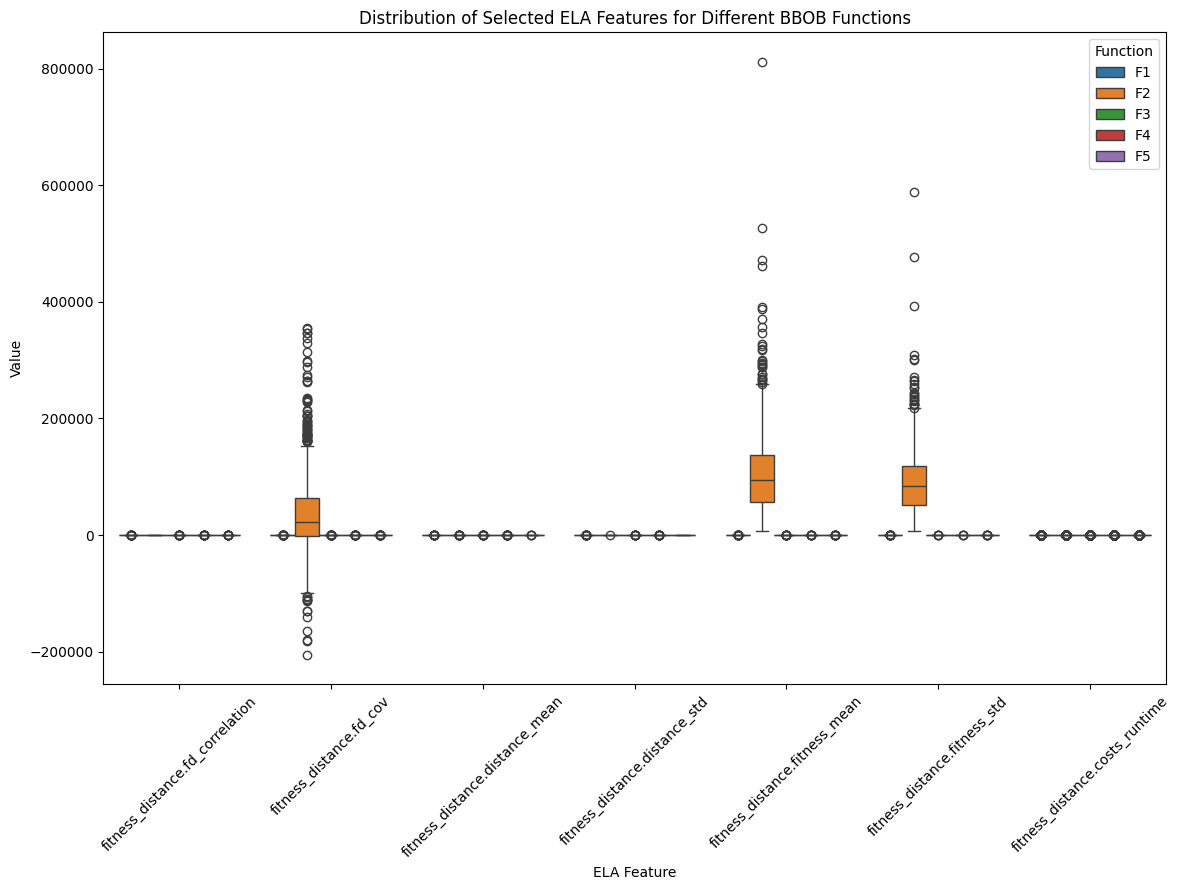

In [38]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_3, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

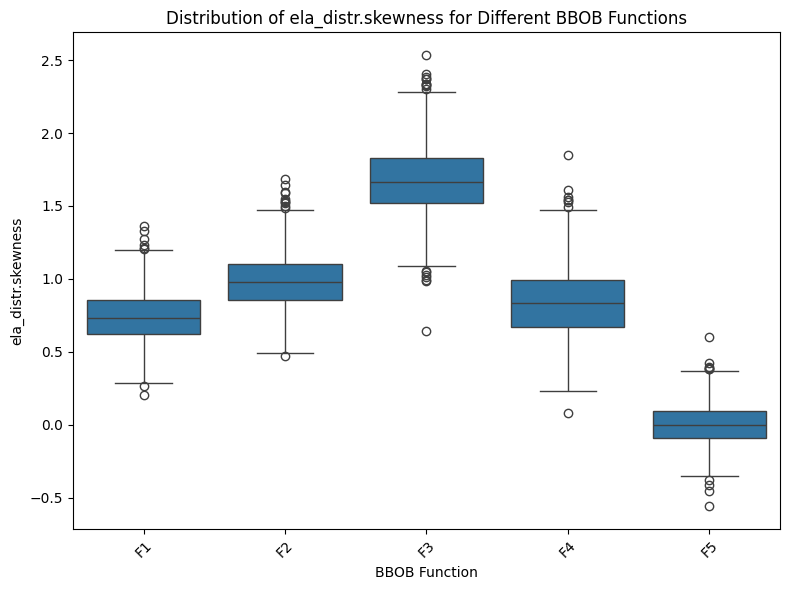

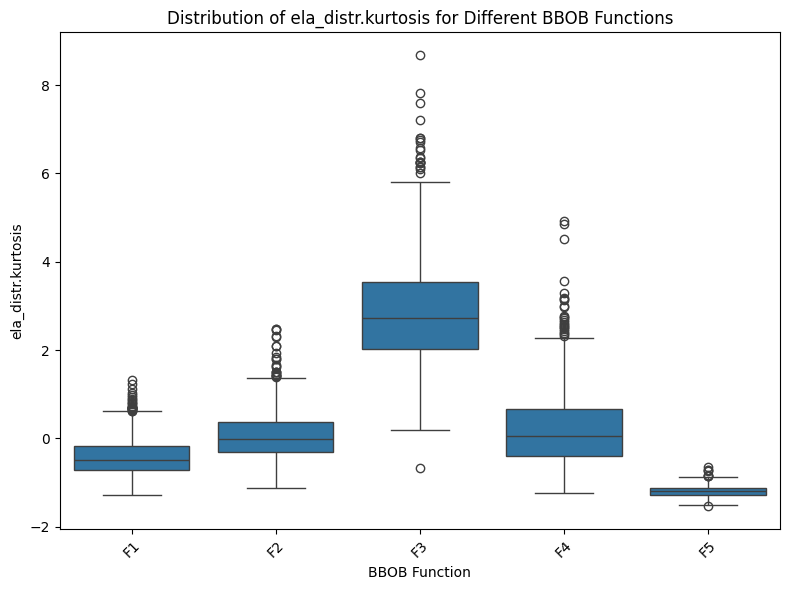

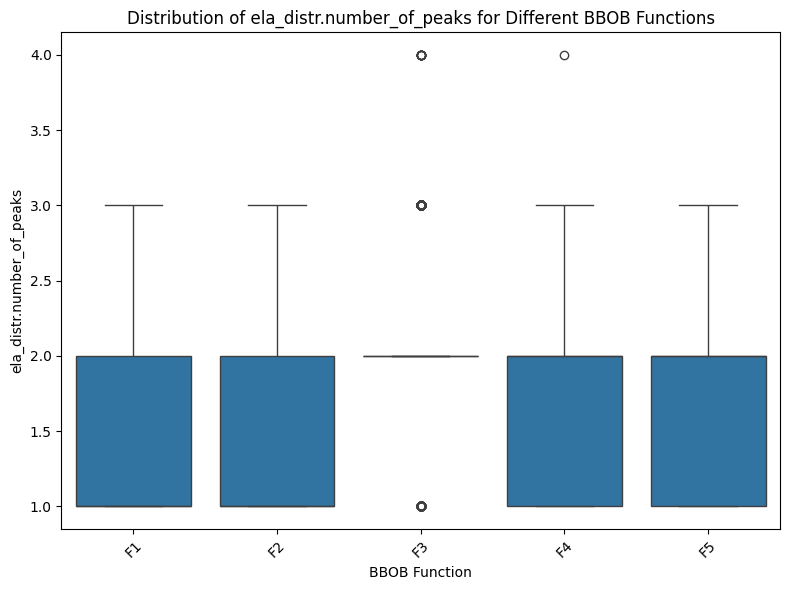

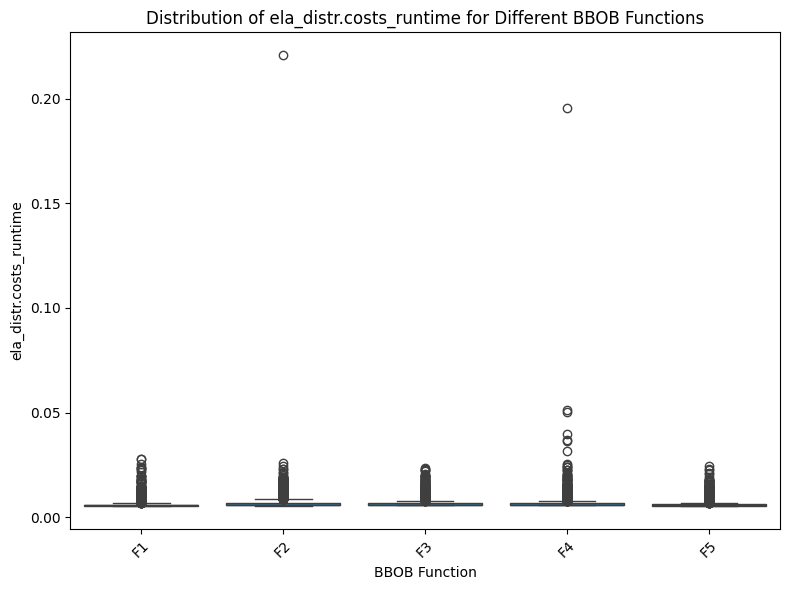

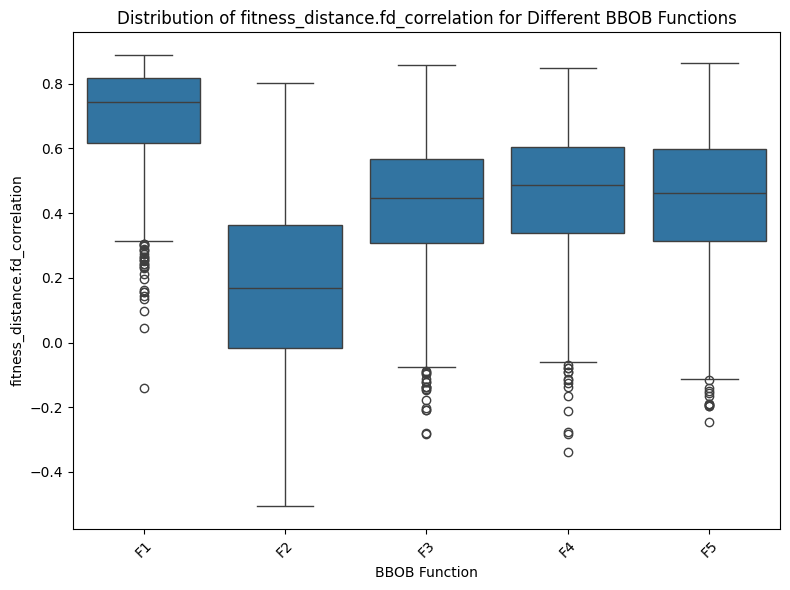

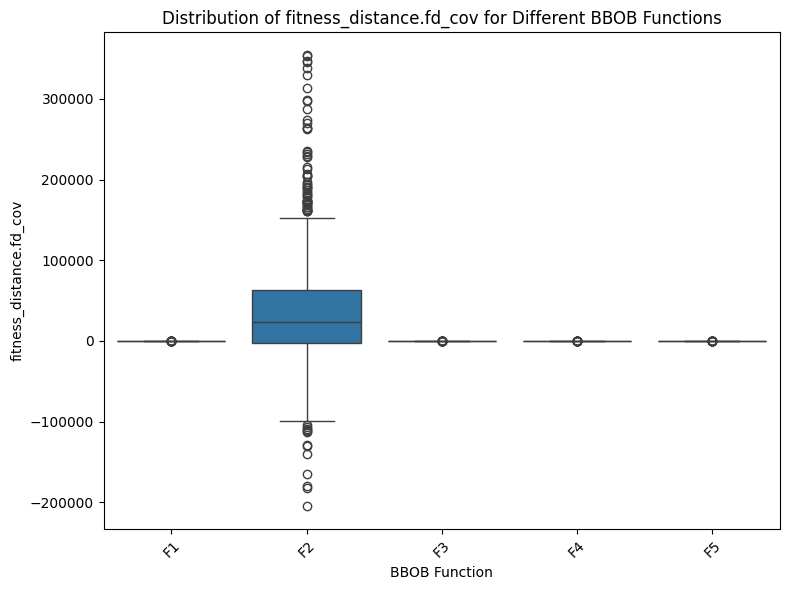

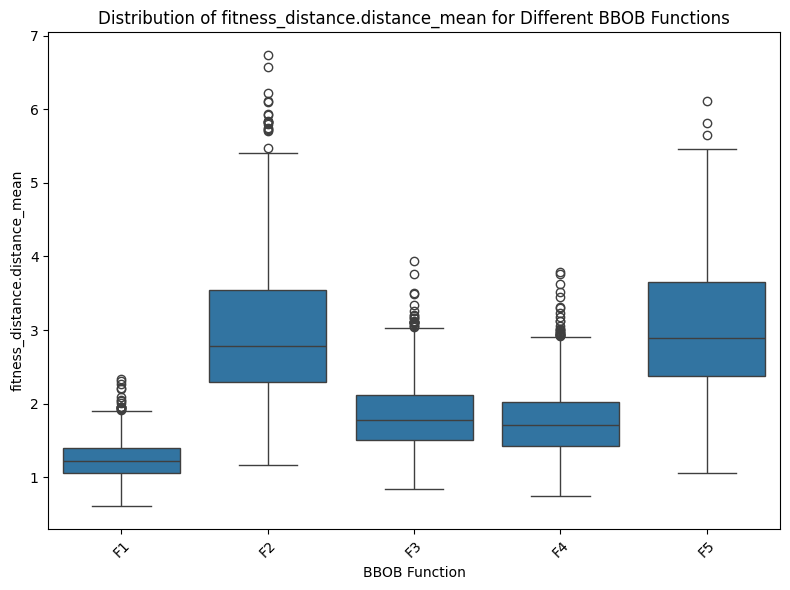

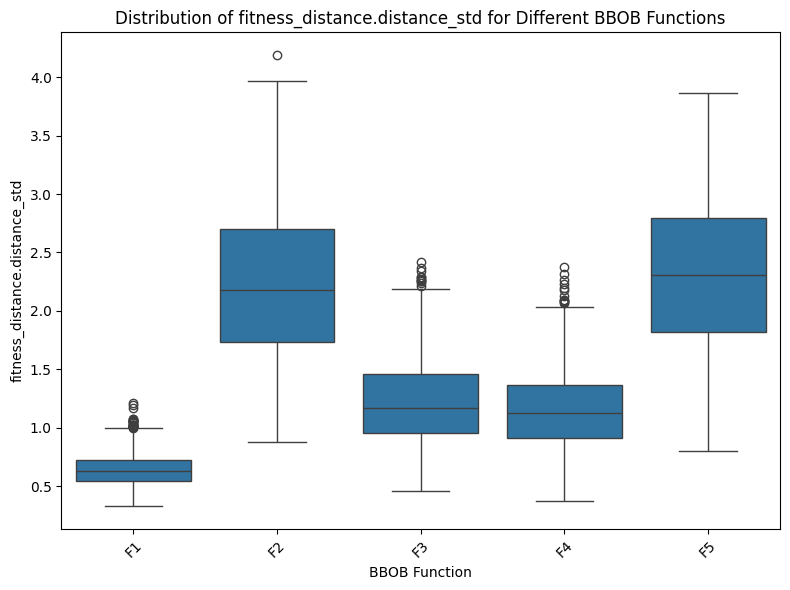

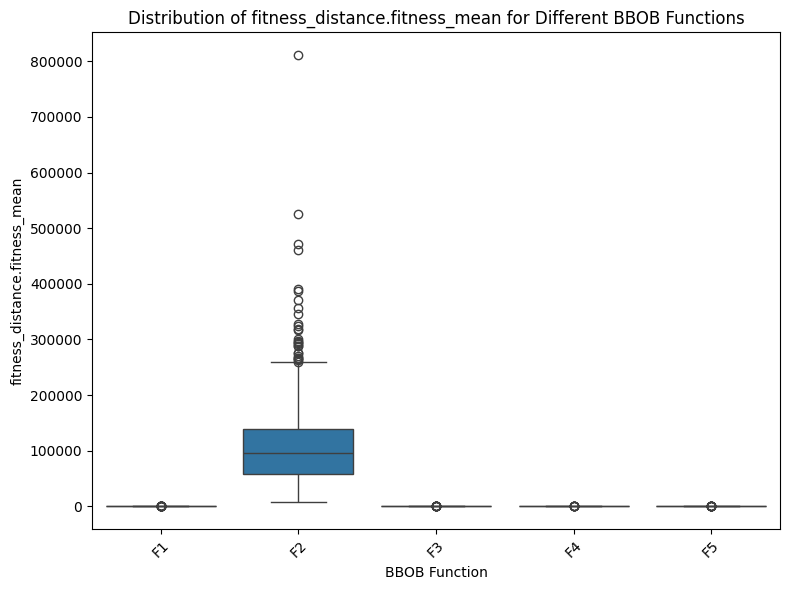

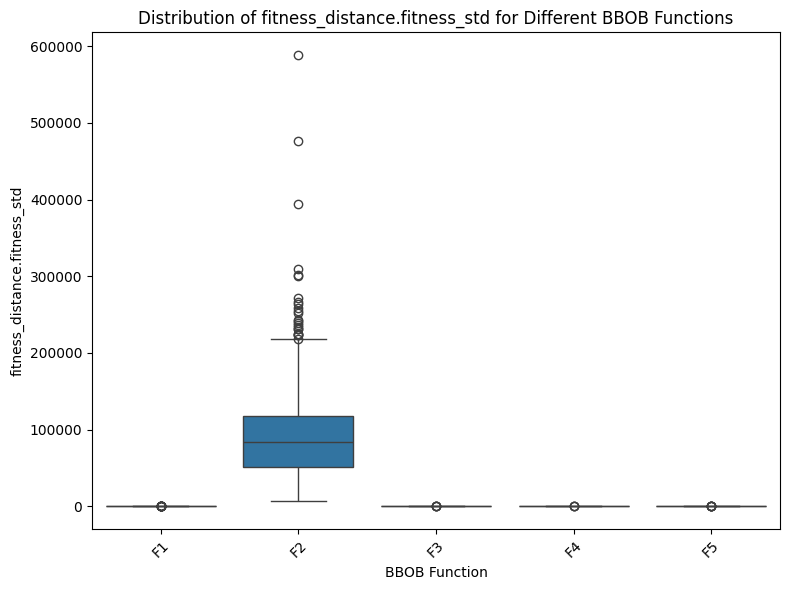

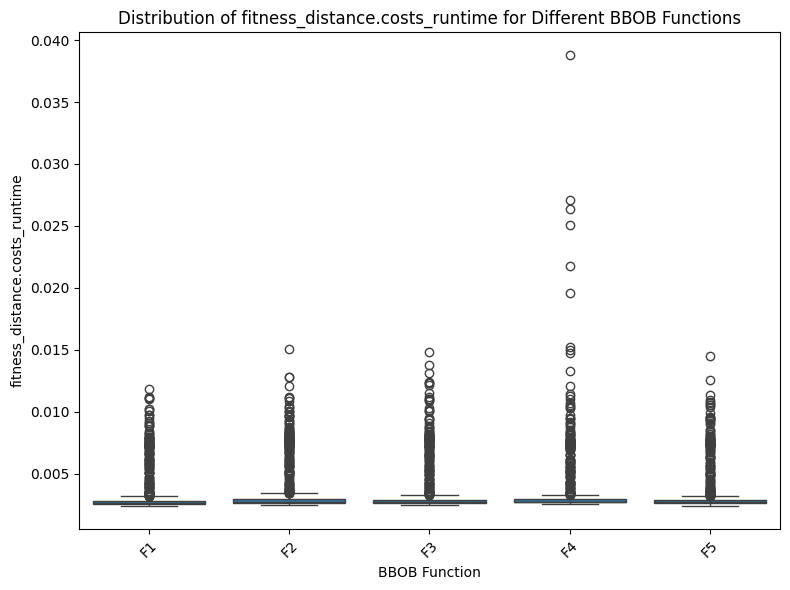

In [39]:
for feature in selected_features_1:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=ela_data_df, x='Function', y=feature)
    plt.title(f"Distribution of {feature} for Different BBOB Functions")
    plt.xlabel("BBOB Function")
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

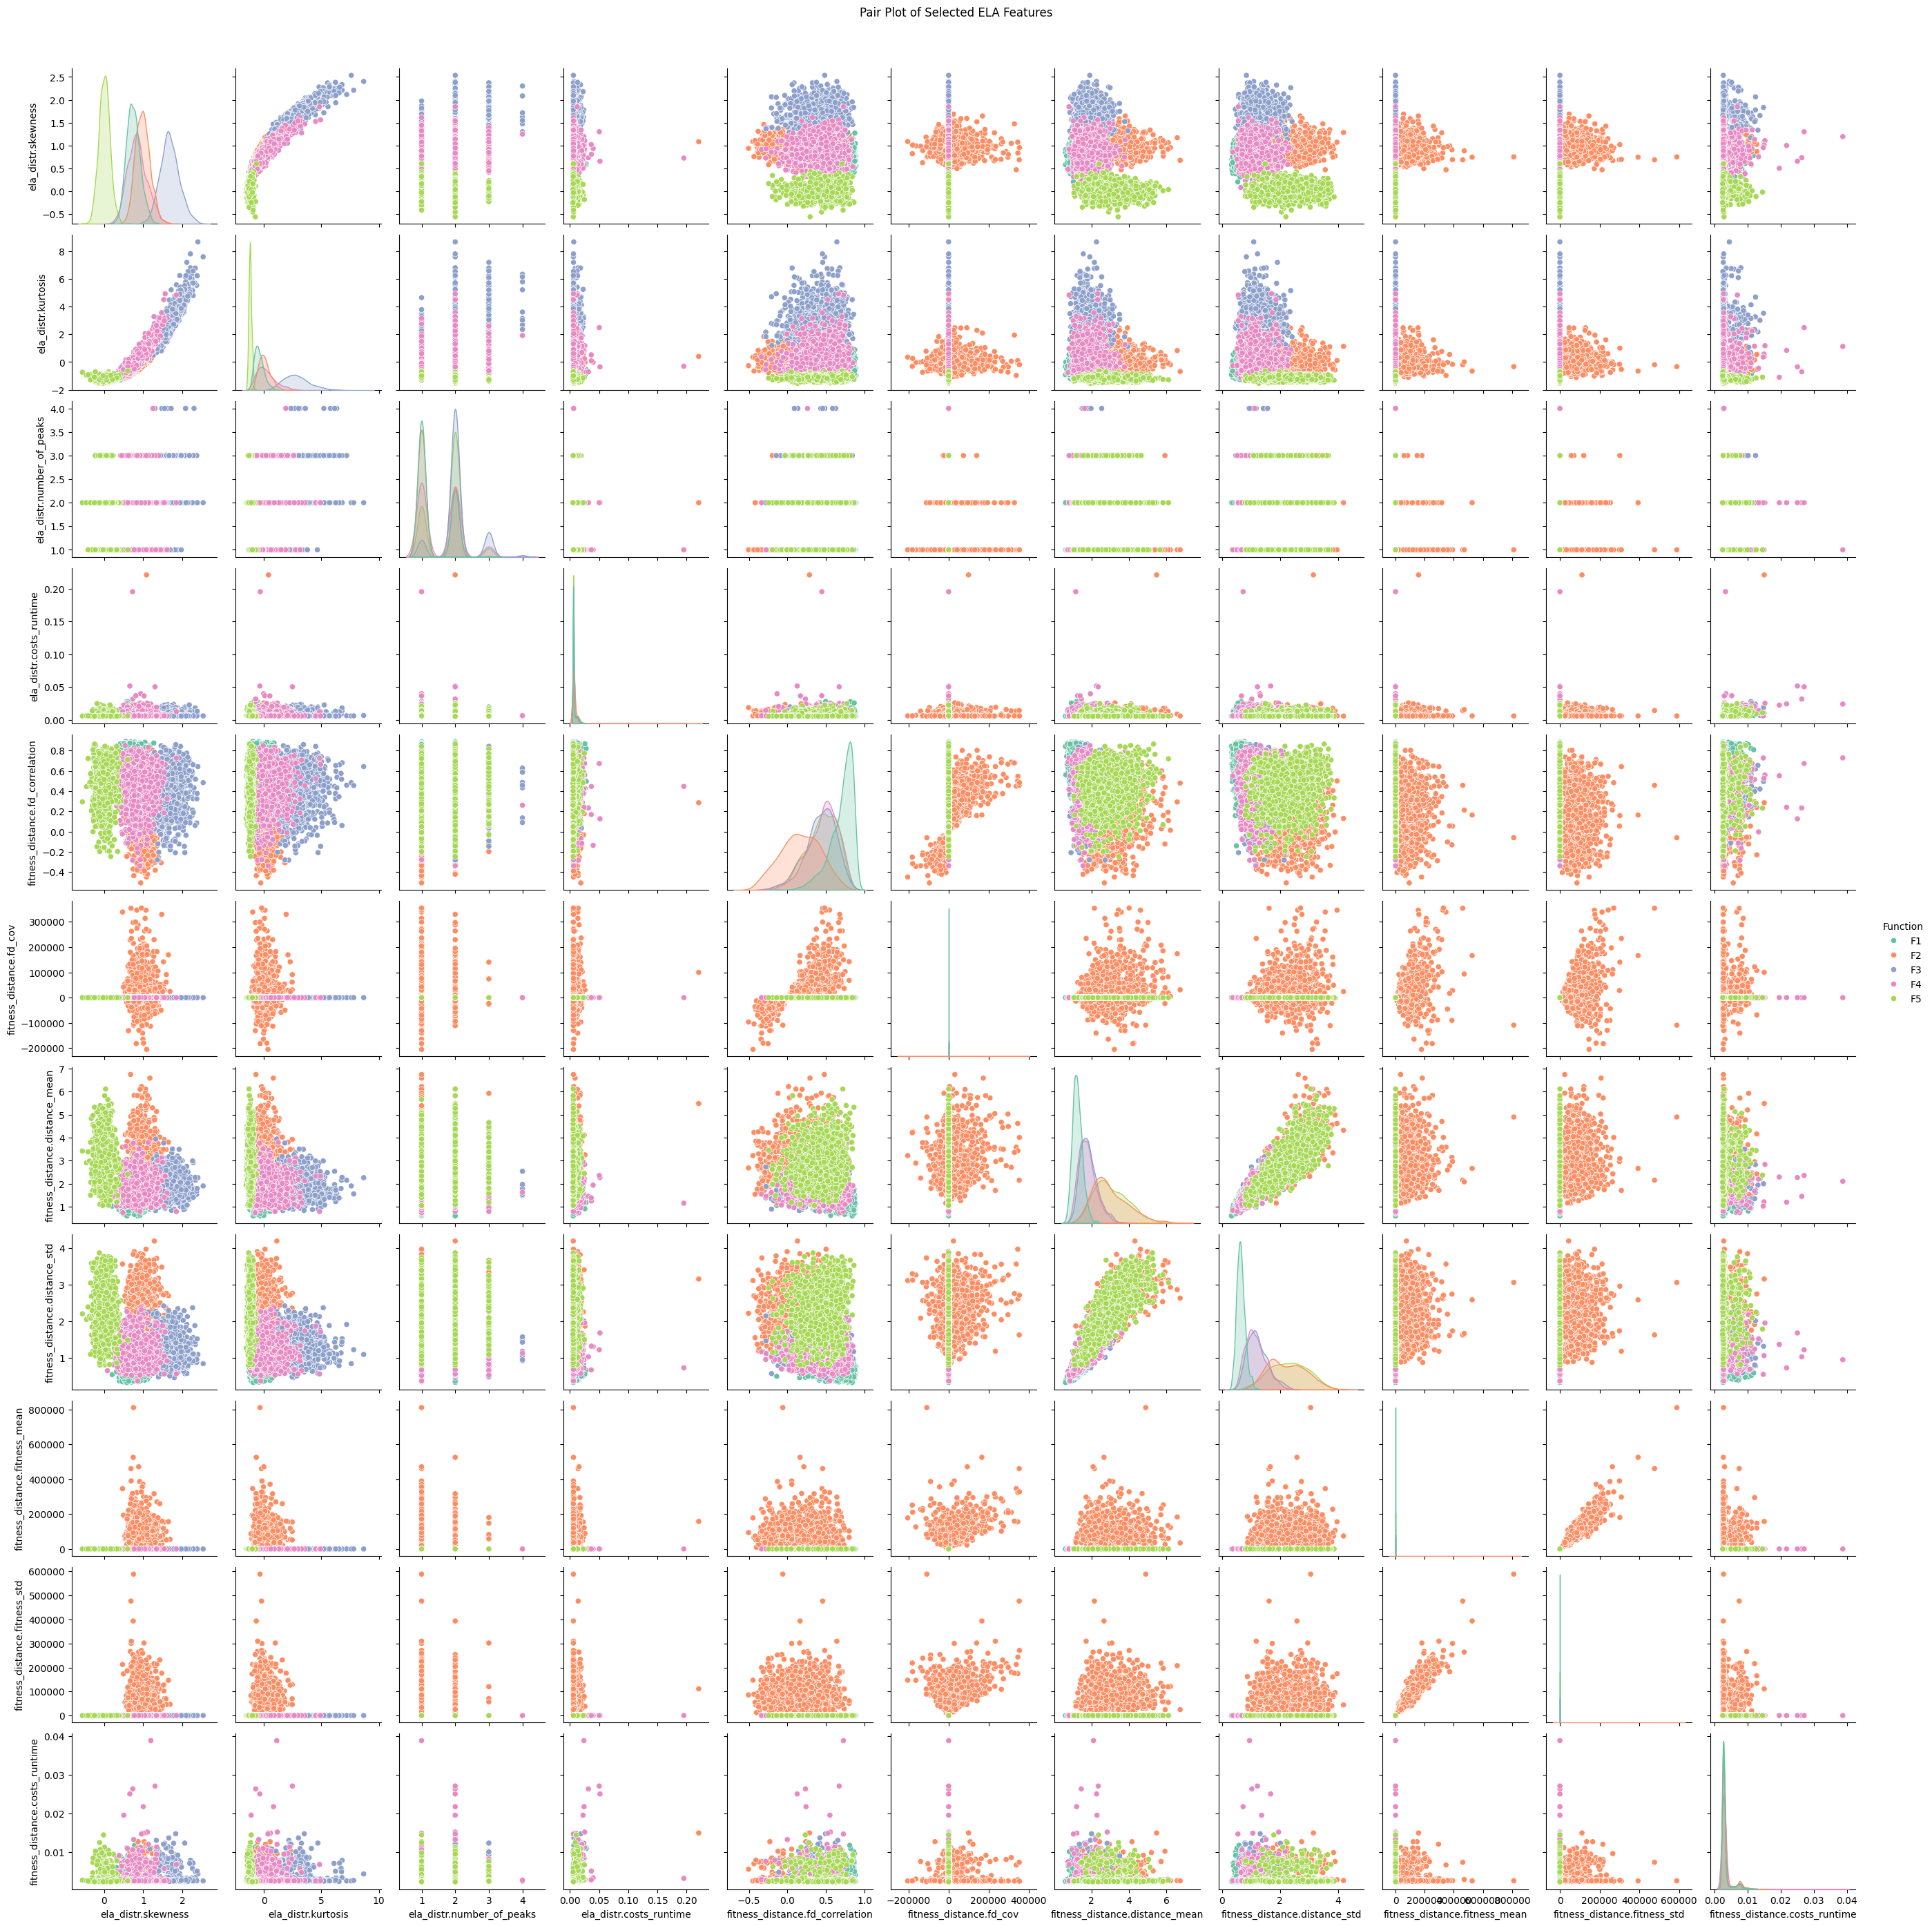

In [40]:
sns.pairplot(ela_data_df, hue="Function", vars=selected_features_1, palette="Set2")
plt.suptitle("Pair Plot of Selected ELA Features", y=1.02)
plt.show()


### Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [41]:

X = ela_data_df.drop('Function', axis=1)
y = ela_data_df['Function']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Accuracy: 0.982


In [43]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.962


In [44]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.981


### Classification with PCA

In [46]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.925


In [47]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.898


In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.868


In [49]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.546
